### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
import matplotlib.cm as cm


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



###Ingreso total por cada tienda


In [ ]:
Ingreso_por_tienda = pd.DataFrame({
    "Tienda 1": [tienda1["Precio"].sum()],
    "Tienda 2": [tienda2["Precio"].sum()],
    "Tienda 3": [tienda3["Precio"].sum()],
    "Tienda 4": [tienda4["Precio"].sum()]
})
Ingreso_por_tienda = Ingreso_por_tienda.astype(int)
print(Ingreso_por_tienda)

     Tienda 1    Tienda 2    Tienda 3    Tienda 4
0  1150880400  1116343500  1098019600  1038375700


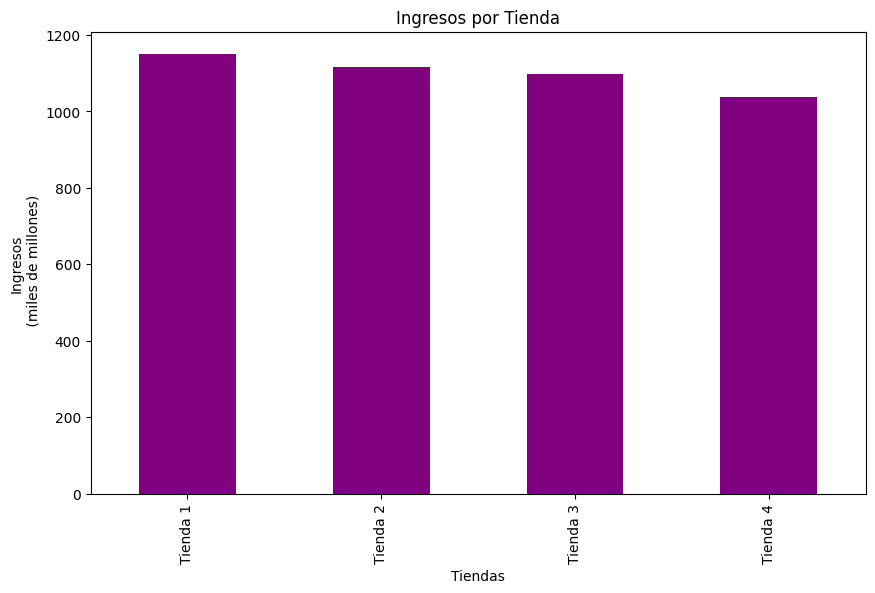

In [ ]:
#Ajustando los valores de los ingresos
serie_ingresos = (Ingreso_por_tienda.iloc[0] / 1_000_000)
ejes = serie_ingresos.plot(kind='bar',figsize=(10,6),color='Purple')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos\n (miles de millones)')
plt.title('Ingresos por Tienda')

#Ajustando la visualización de los ejes
ejes.ticklabel_format(style='plain', axis='y')

# Guardando la figura
plt.savefig('ingresos_por_tienda.png')
plt.show()

# 2. Ventas por categoría

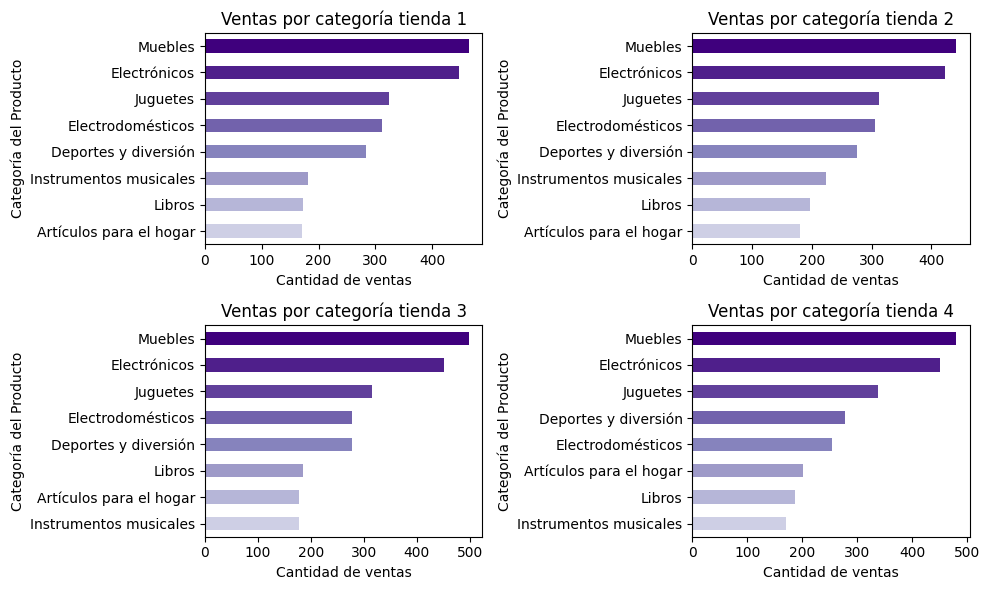

In [ ]:

ventas_categoria_tienda1 = tienda1['Categoría del Producto'].value_counts()
ventas_categoria_tienda2 = tienda2['Categoría del Producto'].value_counts()
ventas_categoria_tienda3 = tienda3['Categoría del Producto'].value_counts()
ventas_categoria_tienda4 = tienda4['Categoría del Producto'].value_counts()

fig, ax = plt.subplots(2,2,figsize=(10, 6))

#Creando colores degradados
n = len(ventas_categoria_tienda1)

colores = plt.cm.Purples(np.linspace(0.3, 1, n)) #Rango del 0 al 1 de colormap

#Sub gráfica 1
ventas_categoria_tienda1.sort_values(ascending=True).plot(kind='barh',  color= colores,ax = ax[0,0])
ax[0,0].set_title('Ventas por categoría tienda 1')
ax[0,0].set_xlabel('Cantidad de ventas')

#Sub gráfica 2
ventas_categoria_tienda2.sort_values(ascending=True).plot(kind='barh',  color= colores,ax = ax[0,1])
ax[0,1].set_title('Ventas por categoría tienda 2')
ax[0,1].set_xlabel('Cantidad de ventas')

#Sub gráfica 3
ventas_categoria_tienda3.sort_values(ascending=True).plot(kind='barh',  color= colores,ax = ax[1,0])
ax[1,0].set_title('Ventas por categoría tienda 3')
ax[1,0].set_xlabel('Cantidad de ventas')

#Sub gráfica 4
ventas_categoria_tienda4.sort_values(ascending=True).plot(kind='barh',  color= colores,ax = ax[1,1])
ax[1,1].set_title('Ventas por categoría tienda 4')
ax[1,1].set_xlabel('Cantidad de ventas')

plt.tight_layout()

# Guardando la figura
plt.savefig('ventas_por_categoria.png')
plt.show()



In [ ]:
print('Venta por categoría tienda 1:\n',ventas_categoria_tienda1)
print('Venta por categoría tienda 2:\n',ventas_categoria_tienda2)
print('Venta por categoría tienda 3:\n',ventas_categoria_tienda3)
print('Venta por categoría tienda 4:\n',ventas_categoria_tienda4)


Venta por categoría tienda 1:
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
Venta por categoría tienda 2:
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64
Venta por categoría tienda 3:
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64
Venta por catego

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_por_tienda = pd.DataFrame({
    "Tienda 1": [tienda1["Calificación"].mean()],
    "Tienda 2": [tienda2["Calificación"].mean()],
    "Tienda 3": [tienda3["Calificación"].mean()],
    "Tienda 4": [tienda4["Calificación"].mean()]
})
calificacion_por_tienda = calificacion_por_tienda.astype(int)
print(calificacion_por_tienda)

   Tienda 1  Tienda 2  Tienda 3  Tienda 4
0         3         4         4         3


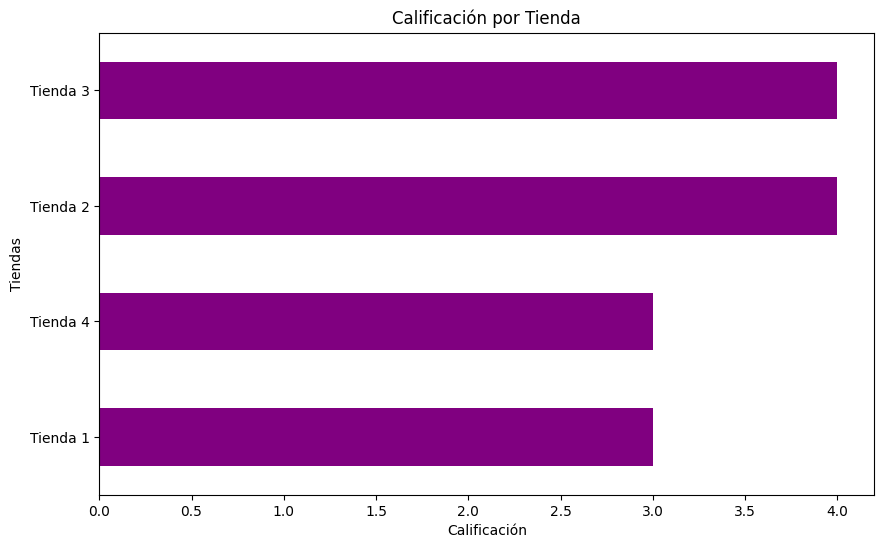

In [ ]:

serie_calificaciones = calificacion_por_tienda.iloc[0]
serie_calificaciones.sort_values(ascending=True).plot(kind='barh',figsize=(10,6),color = 'Purple')
plt.xlabel('Calificación')
plt.ylabel('Tiendas')
plt.title('Calificación por Tienda')

# Guardando la figura
plt.savefig('calificacion_por_tienda.png')
plt.show()

# 4. Productos más y menos vendidos

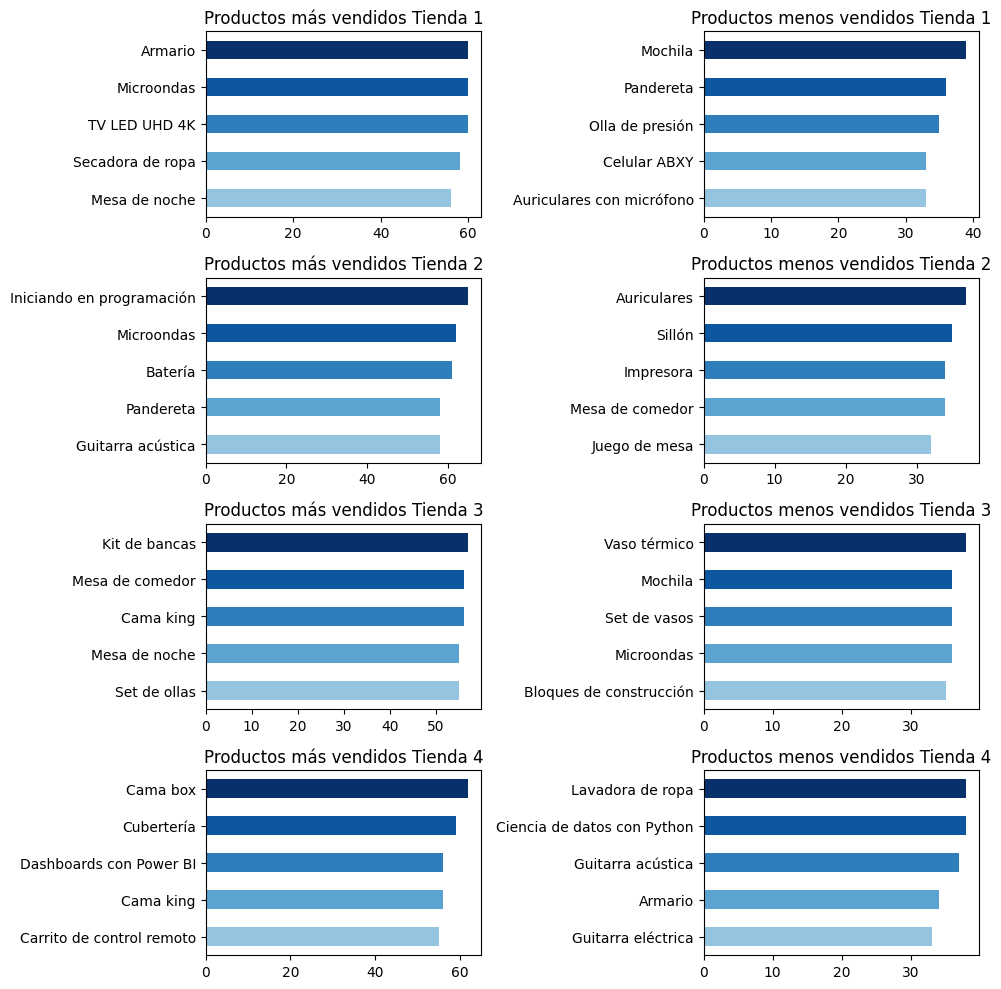

In [ ]:

ventas_producto_tienda1 = tienda1['Producto'].value_counts()
ventas_producto_tienda2 = tienda2['Producto'].value_counts()
ventas_producto_tienda3 = tienda3['Producto'].value_counts()
ventas_producto_tienda4 = tienda4['Producto'].value_counts()


# Colores

cant_colores = 5
colores_top = cm.Blues(np.linspace(0.4, 1, cant_colores))

#Dimensionando la gráfica de gráficas

fig, ax = plt.subplots(4,2,figsize=(10, 10))

#Subgráfica 1
Top5_tienda1 = ventas_producto_tienda1 .sort_values(ascending=False).head(5)
Top5_tienda1.sort_values().plot(kind='barh', color = colores_top,ax = ax[0,0],)
ax[0,0].set_title('Productos más vendidos Tienda 1')
ax[0,0].set_ylabel('')

#Subgráfica 2
bottom5_tienda1 = ventas_producto_tienda1.sort_values(ascending=True).head(5)
bottom5_tienda1.sort_values().plot(kind='barh', color = colores_top ,ax = ax[0,1])
ax[0,1].set_title('Productos menos vendidos Tienda 1')
ax[0,1].set_ylabel('')

# Subgráfica 3
Top5_tienda2 = ventas_producto_tienda2.sort_values(ascending=False).head(5)
Top5_tienda2.sort_values().plot(kind='barh', color = colores_top,ax = ax[1,0])
ax[1,0].set_title('Productos más vendidos Tienda 2')
ax[1,0].set_ylabel('')

# Subgráfica 4
bottom5_tienda2 = ventas_producto_tienda2.sort_values(ascending=True).head(5)
bottom5_tienda2.sort_values().plot(kind='barh', color = colores_top,ax = ax[1,1])
ax[1,1].set_title('Productos menos vendidos Tienda 2')
ax[1,1].set_ylabel('')

# Subgráfica 5

Top5_tienda3 = ventas_producto_tienda3.sort_values(ascending=False).head(5)
Top5_tienda3.sort_values().plot(kind='barh', color = colores_top,ax = ax[2,0])
ax[2,0].set_title('Productos más vendidos Tienda 3')
ax[2,0].set_ylabel('')

#Subgráfica 6

bottom5_tienda3 = ventas_producto_tienda3.sort_values(ascending=True).head(5)
bottom5_tienda3.sort_values().plot(kind='barh', color = colores_top,ax = ax[2,1])
ax[2,1].set_title('Productos menos vendidos Tienda 3')
ax[2,1].set_ylabel('')

#Subgráfica 7

Top5_tienda4 = ventas_producto_tienda4.sort_values(ascending=False).head(5)
Top5_tienda4.sort_values().plot(kind='barh', color = colores_top,ax = ax[3,0])
ax[3,0].set_title('Productos más vendidos Tienda 4')
ax[3,0].set_ylabel('')

# Subgráfica 8

bottom5_tienda4 = ventas_producto_tienda4.sort_values(ascending=True).head(5)
bottom5_tienda4.sort_values().plot(kind='barh', color = colores_top,ax = ax[3,1])
ax[3,1].set_title('Productos menos vendidos Tienda 4')
ax[3,1].set_ylabel('')

plt.tight_layout()

# Guardando la figura
plt.savefig('productos_mas_menos_vendidos.png')
plt.show()


In [ ]:
print('Top 5 ventas tienda 1:\n',Top5_tienda1.to_frame(), '\n')
print('Bottom 5 ventas tienda 1:\n',bottom5_tienda1.to_frame(), '\n')
print('Top 5 ventas tienda 2:\n',Top5_tienda2.to_frame(), '\n')
print('Bottom 5 ventas tienda 2:\n',bottom5_tienda2.to_frame(), '\n')
print('Top 5 ventas tienda 3:\n',Top5_tienda3.to_frame(), '\n')
print('Bottom 5 ventas tienda 3:\n',bottom5_tienda3.to_frame(), '\n')
print('Top 5 ventas tienda 4:\n',Top5_tienda4.to_frame(), '\n')
print('Bottom 5 ventas tienda 4:\n',bottom5_tienda4.to_frame(), '\n')


Top 5 ventas tienda 1:
                   count
Producto               
Microondas           60
TV LED UHD 4K        60
Armario              60
Secadora de ropa     58
Mesa de noche        56 

Bottom 5 ventas tienda 1:
                            count
Producto                        
Auriculares con micrófono     33
Celular ABXY                  33
Olla de presión               35
Pandereta                     36
Mochila                       39 

Top 5 ventas tienda 2:
                            count
Producto                        
Iniciando en programación     65
Microondas                    62
Batería                       61
Guitarra acústica             58
Pandereta                     58 

Bottom 5 ventas tienda 2:
                  count
Producto              
Juego de mesa       32
Mesa de comedor     34
Impresora           34
Sillón              35
Auriculares         37 

Top 5 ventas tienda 3:
                  count
Producto              
Kit de bancas       57
Mesa d

# 5. Envío promedio por tienda

In [ ]:
costo_envio_por_tienda = pd.DataFrame({
    "Tienda 1": [tienda1["Costo de envío"].mean()],
    "Tienda 2": [tienda2["Costo de envío"].mean()],
    "Tienda 3": [tienda3["Costo de envío"].mean()],
    "Tienda 4": [tienda4["Costo de envío"].mean()]
})
costo_envio_por_tienda = costo_envio_por_tienda.astype(int)
print(costo_envio_por_tienda)

   Tienda 1  Tienda 2  Tienda 3  Tienda 4
0     26018     25216     24805     23459


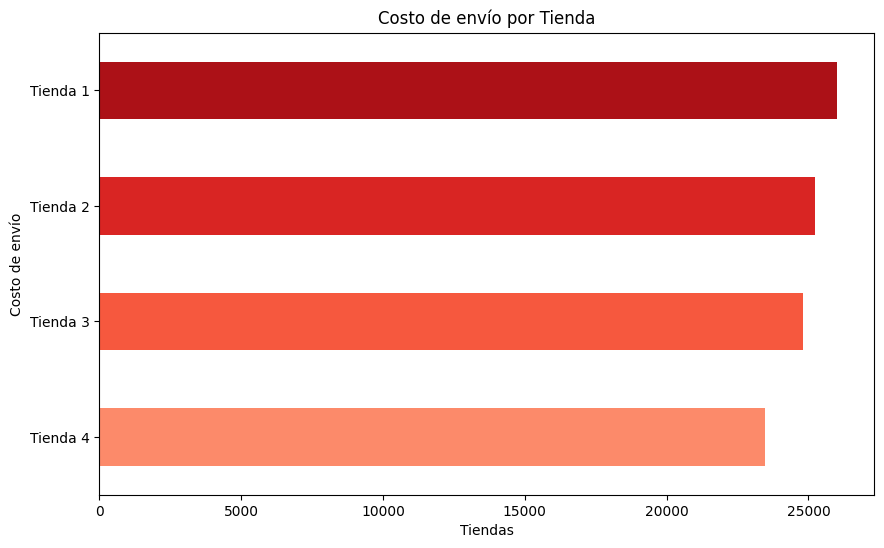

In [ ]:
serie_envios = costo_envio_por_tienda.iloc[0]

colores_envios = cm.Reds(np.linspace(0.4, 1,5))
serie_envios.sort_values(ascending=True).plot(kind='barh',figsize=(10,6),color = colores_envios)
plt.xlabel('Tiendas')
plt.ylabel('Costo de envío')
plt.title('Costo de envío por Tienda')
# Guardando la figura
plt.savefig('costo_envio_por_tienda.png')
plt.show()


# **Informe final**


### Introducción

El presente informe se elabora para ayudar al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento.

Para ello se analizaron los datos de ventas, rendimiento y reseñas de las cuatro tiendas de Alura Store.



### Objetivos

- Identificar la tienda menos eficiente de la cadena Alura Store.
- Presentar una recomendación informada para vender una de las tiendas.



### Análisis de la información

Los dataframe presentan la información correspondiente a las ventas en cuatro tiendas de la cadena Alura Store y cuentan con la siguiente información:

- Producto y Categoría: Artículos vendidos y sus calificaciones.

- Precio y Envío: Valores de venta y costos asociados.

- Fecha y ubicación de compra: Información temporal y geográfica.

- Evaluación de compra: Comentarios de clientes.

- Tipo de Pago y Cuotas: Métodos utilizados por los clientes.

- Coordenadas Geográficas: Ubicación de las transacciones.

Procedemos a realizar un análisis detallado de la información:

#### Ventas por tienda

En este análisis se calculó el ingreso total por cada tienda (Figura 1) y se obtubo la siguiente información:

- Tienda 1 $1,150 Millones

- Tienda 2 $1,116 Millones

- Tienda 3 $1,098 Millones

- Tienda 4 $1,038 Millones
    

**Figura 1**

![Ingresos por tienda](img/ingresos_por_tienda.png)

De acuerdo con esta figura es la tienda 4 la que presenta menores ingresos para la cadena Alura Store.

#### Ventas por categoría

En este análisis se calculó las unidades totales vendidas por categoría en cada tienda como se puede ver en la figura 2

**Figura 2**

![Ventas por categoría](img/ventas_por_categoria.png)

De acuerdo con esta información los muebles, equipos electrónicos y juguetes representan las tres categorías más vendidas en cada tienda y presentan variaciones poco significativas.

#### Calificación por tienda

En este análisis se promedió la calificación recibida por los usuarios en cada tiendo dando como resultado la figura 3:

**Figura 3**

![Calificación por tienda](img/calificacion_por_tienda.png)

De acuerdo con esta información las tiendas 1 y 4 presentan un desempeño menor a las otras dos tiendas.

#### Productos más y menos vendidos

En este análisi se presentan los 5 productos más vendidos y los cinco productos menos vendidos en cada tienda y lo vemos reflejado en la figura 4:

**Figura 4**

![Productos mas y menos vendidos](img/productos_mas_menos_vendidos.png)

En este apartado se puede apreciar que la cantidad de unidades más vendidas en cada tienda está al rededor de las 60 unidades y las unidades menos vendidas al rededor de las 30 unidades, siendo la tienda 4 la que menos unidades vende por producto.

#### Valor del envío por tienda

En este análisis se evidenció de acuerdo con la figura 5 el valor promedio del costo de envío

**Figura 5**

![Costo envío por tienda](img/costo_envio_por_tienda.png)

De acuerdo con lo anterior se evidencia que la tienda 4 presenta un valor promedio de envío menor que las otras tiendas.



### Conclusión

- De acuerdo con los anális realizados la tienda 4 es la que menor desempeño presenta en la cadena Alura Store.
- La tienda a vender debería ser la tienda 4 ya que esta es la que menor desempeño presenta.